In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv("SB11_20222.TXT", sep="¬")
df = df[df['PUNT_MATEMATICAS']!=0] # FILTER ONE

C:\Users\iván\AppData\Local\Temp\ipykernel_12792\1594950697.py:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df =  pd.read_csv("SB11_20222.TXT", sep="¬")


In [3]:
X=['PUNT_LECTURA_CRITICA', 'ESTU_GENERO', 'COLE_NATURALEZA', 'COLE_JORNADA', 'COLE_COD_DEPTO_UBICACION', 'COLE_DEPTO_UBICACION', 'COLE_COD_MCPIO_UBICACION', 'COLE_MCPIO_UBICACION']
df_ = df[X].copy()
df = df_.copy()

In [4]:
df['mean-mpo'] = df.groupby(by=['COLE_COD_MCPIO_UBICACION'])['PUNT_LECTURA_CRITICA'].transform('mean')

In [5]:
df.dropna(inplace=True) # Must change the results 
df.reset_index(inplace=True)

In [6]:
df['COLE_COD_MCPIO_UBICACION'] = df['COLE_COD_MCPIO_UBICACION'].astype('int64')

In [7]:
map_df = df[['mean-mpo', 'COLE_COD_MCPIO_UBICACION']]
map_df = map_df.drop_duplicates(subset=['COLE_COD_MCPIO_UBICACION']).reset_index(drop=True)

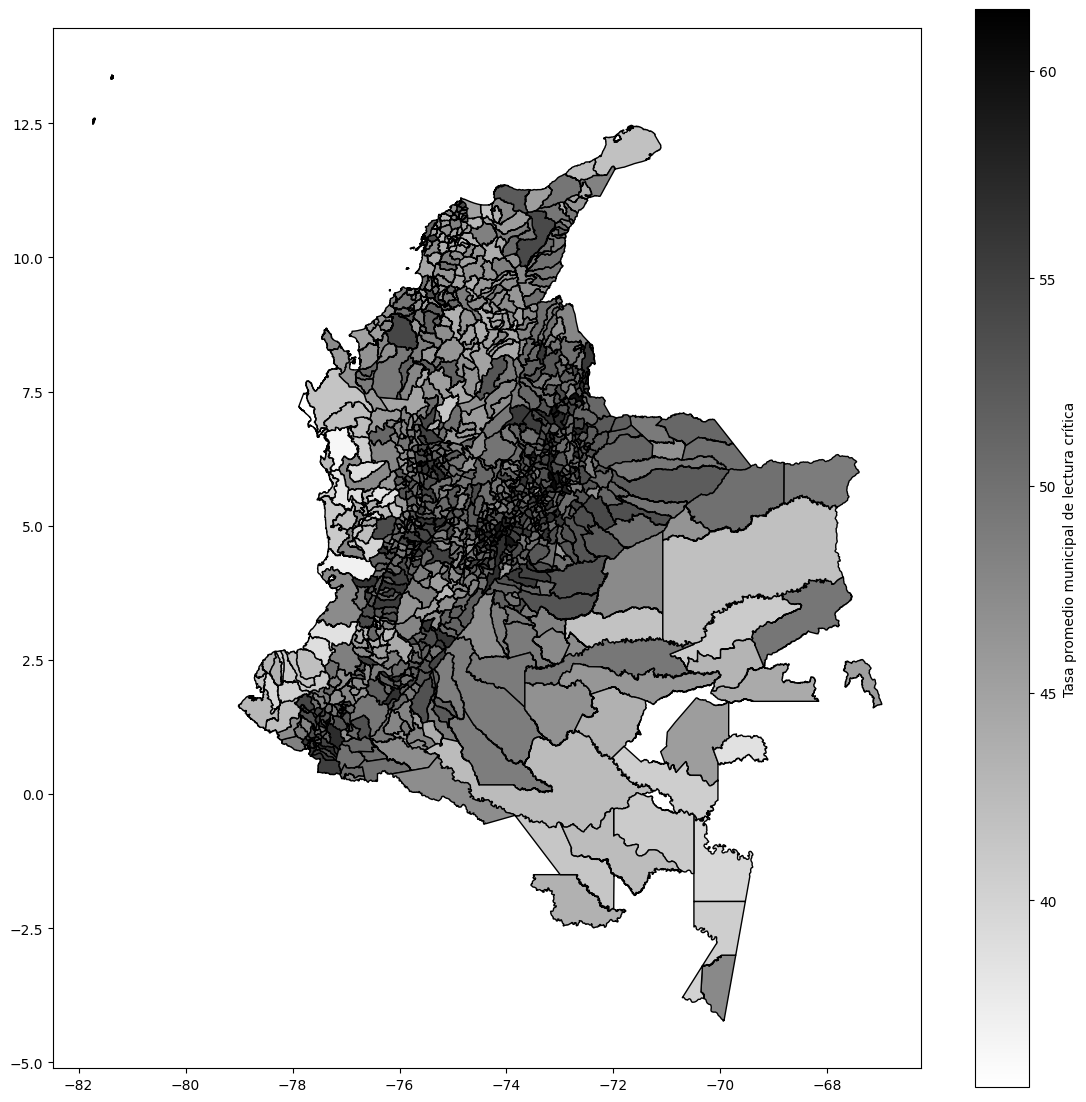

In [8]:
geomap  = gpd.read_file("MGN_MPIO_POLITICO.shp")
geomap['MPIO_CDPMP'] = geomap['MPIO_CDPMP'].astype('int64')
map_plot = geomap.merge(map_df, left_on=['MPIO_CDPMP'], right_on=['COLE_COD_MCPIO_UBICACION'])
map_plot.replace(0,np.nan, inplace=True)

map_plot.plot(
column="mean-mpo",
cmap='binary',
edgecolor='black',
alpha=1,
legend=True,
figsize=(14, 14),
missing_kwds={
        "color": "white",
        "edgecolor": "gray",
        "hatch": "///",
        "label": "Missing values",    },
legend_kwds={
     'label': "Tasa promedio municipal de lectura crítica",
    'orientation': "vertical"
 })
plt.savefig("Mapa.png")

In [9]:
# Implement  The gini calculation with add..

In [10]:
# We are going to construct the Departamental map...
df['mean-dpto'] = df.groupby(by=['COLE_DEPTO_UBICACION'])['PUNT_LECTURA_CRITICA'].transform("mean")
df_map_dpto = df.copy()
df_map_dpto =  df_map_dpto.drop_duplicates(subset=['COLE_DEPTO_UBICACION']).reset_index()
geomap  = gpd.read_file("MGN_DPTO_POLITICO.shp")

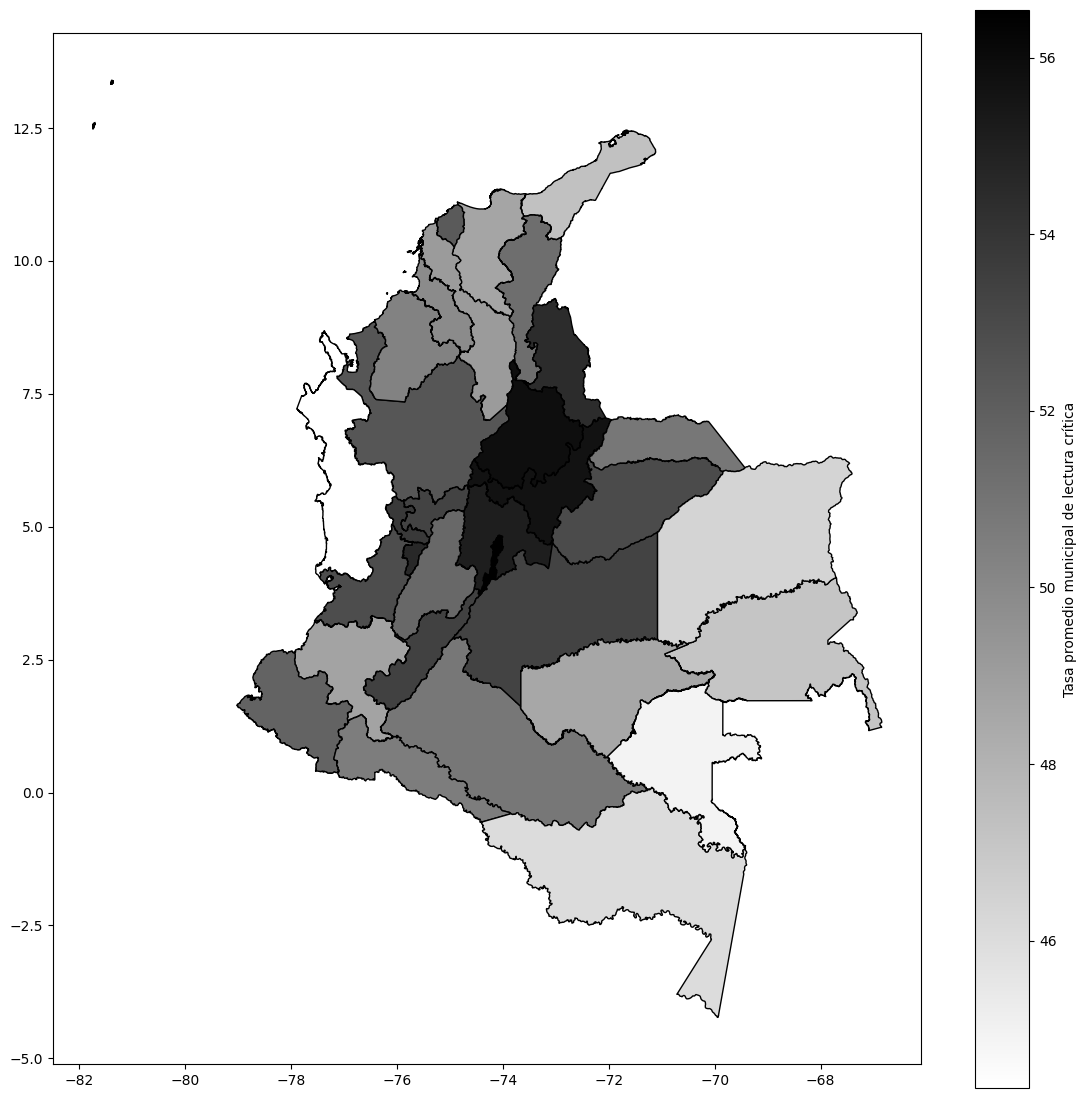

In [11]:
geomap["DPTO_CCDGO"] = geomap["DPTO_CCDGO"].astype('int64')
map_plot = geomap.merge(df_map_dpto, left_on=['DPTO_CCDGO'], right_on=['COLE_COD_DEPTO_UBICACION'])
map_plot.plot(
column="mean-dpto",
cmap='binary',
edgecolor='black',
alpha=1,
legend=True,
figsize=(14, 14),
missing_kwds={
        "color": "white",
        "edgecolor": "gray",
        "hatch": "///",
        "label": "Missing values",    },
legend_kwds={
     'label': "Tasa promedio municipal de lectura crítica",
    'orientation': "vertical"
 })
plt.savefig("MapaDpto.png")